<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2018_02_1_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 2018-02 I
Una partícula de masa m=0.2 Kg se mueve durante 0.4s de acuerdo a la trayectoría física descrita por los datos en:

https://github.com/restrepo/ComputationalMethods/blob/master/data/mvto.csv

con un error en x en la octava cifra decimal
1. Determinar si la partícula esta en un movimiento de caída libre (obtener velocidad inicial) o en movimiento armónico simple  (obtener frecuencia angular)
1.  Determinar la función de velocidad y aceleración  y comprobar la conservación de energía


## Decomposition

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import numpy as np
import pandas as pd

In [0]:
def xs(t,tend=0.4): 
    g=9.8
    xmax=g*tend**2/8 # Free fall formula
    w=(np.pi/2)/( 0.5*tend ) # v=0 condition for x=sin(w*t)
    return xmax*np.sin(w*t)

In [0]:
def x(t,m=0.2,tend=0.4):
    g=9.8
    v0=g*tend/2
    return v0*t-0.5*g*t**2

In [0]:
d=pd.DataFrame( {'t':tt,'x':xs(tt) })

randomize x

In [0]:
d['x']=d.x.values+np.random.uniform(-1,1,d.x.size)*1E-8

In [0]:
d.round(8).to_csv('mvto.csv',index=False)

Copy and paste into [GitHub](https://github.com/restrepo/ComputationalMethods/blob/master/data/mvto.csv)

In [0]:
cat mvto.csv

t,x
0.0,-0.0
0.04444444,0.06703595
0.08888889,0.12598637
0.13333333,0.16974099
0.17777778,0.19302233
0.22222222,0.19302231
0.26666667,0.16974098
0.31111111,0.12598637
0.35555556,0.06703594
0.4,-1e-08


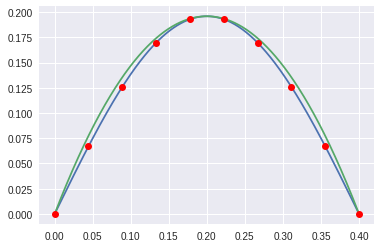

In [0]:
t=np.linspace(0,0.4,1000)
n=10
tt=np.linspace(0,0.4,n)
plt.plot(t,xs(t))
plt.plot(t,x(t))
plt.plot(d.t,d.x,'ro')
#plt.plot(tt,x(tt),'ko')
#plt.xlim(0.15,0.25)
#plt.ylim(0.175,0.2)

## Solución Lagrange

In [0]:
d=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/mvto.csv')

Primero encontramos un modelo fenomenológico que fitee los datos lo mejor posible: Por ejemplo, un polinomio de ordern 9 de Lagrange para los 10 puntos

In [0]:
from scipy import interpolate
from scipy import optimize

In [0]:
p=interpolate.lagrange(d.t,d.x)

print(p)

        9         8         7         6         5          4         3
-6.435 x + 77.62 x - 114.4 x + 13.77 x + 46.07 x + 0.3373 x - 15.85 x
              2
 + 0.0009316 x + 1.539 x


In [0]:
t=np.linspace(0,0.4,10000)
p(t).max()

0.19599999365261267

In [0]:
t=np.linspace(0,0.4,10000)
xmax=p(t).max()

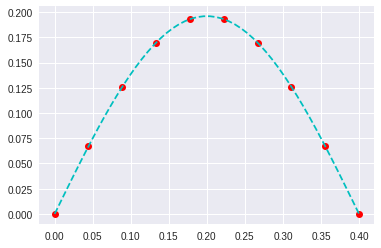

In [0]:
t=np.linspace(0,0.4)
plt.plot(d.t,d.x,'ro')
plt.plot(t,p(t),'c--')b

Luego comparamos el modelo propuesto con el modelo fenomenológico

###  Movimiento armónico simple

In [0]:
def xs(t,w=7,A=xmax): 
    return A*np.sin(w*t)

In [0]:
def fmin(w,tmin=0.,tmax=0.4,n=50):
    t=np.linspace(tmin,tmax,n)
    chi2=( ( ( p(t)-xs(t,w) )/( p(t)+1E-16 )  )**2).sum() # 1E-16 suaviza divergencia
    return chi2

In [0]:
wmin=optimize.fmin_powell(fmin,7,xtol=1E-16)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 24


In [0]:
wmin=wmin.flatten()[0]
wmin

7.853981506558196

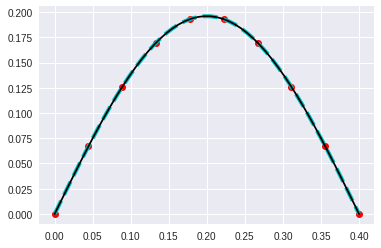

In [0]:
t=np.linspace(0,0.4)
plt.plot(d.t,d.x,'ro')
plt.plot(t,p(t),'c--',lw=4)
plt.plot(t,xs(t,wmin),'k-')

True value

In [0]:
print('wfit={} rad/s'.format( (np.pi/2)/( 0.5*tend ) ) )

wfit=7.853981633974483 rad/s


### Caída libre

In [0]:
def x(t,v0=1.96):
    return v0*t-0.5*g*t**2

In [0]:
def fffmin(v0,tmin=0.,tmax=0.4,n=50):
    t=np.linspace(tmin,tmax,n)
    chi2=( ( ( p(t)-x(t,v0) )/( p(t)+1E-16  )  )**2).sum()
    return chi2

In [0]:
v0min=optimize.fmin_powell(fffmin,1,xtol=1E-16)

Optimization terminated successfully.
         Current function value: 0.596573
         Iterations: 2
         Function evaluations: 76


In [0]:
v0min=v0min.flatten()[0]
v0min

1.9600000249741352

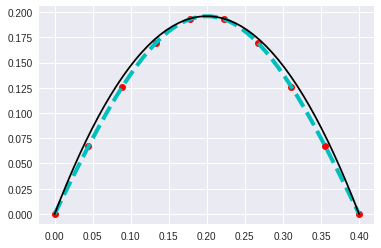

In [0]:
t=np.linspace(0,0.4)
plt.plot(d.t,d.x,'ro')
plt.plot(t,p(t),'c--',lw=4)
plt.plot(t,x(t,v0min),'k-')

In [0]:
x(0.4,v0min)

9.989653881881111e-09

##  Solución II

In [0]:
from scipy import optimize

In [0]:
g=9.8
tend=0.4

In [0]:
p=interpolate.lagrange(d.t,d.x)
t=np.linspace(0,0.4,10000)
xmax=p(t).max()

In [0]:
print( 'True value xmax={} m'.format( g*tend**2/8 ) )

True value xmax=0.19600000000000006 m


###  Movimiento armónico simple

In [0]:
def xs(t,w=7): 
    return xmax*np.sin(w*t)

minimizar en w:

In [0]:
def fmin(w):
    return (  ( ( d.x-xs(d.t,w) )/d.x )**2 ).sum()

In [0]:
wmin=optimize.fmin_powell(fmin,5,xtol=1E-16)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 26


In [0]:
wmin=wmin.flatten()[0]
wmin

7.8539815064240335

check

In [0]:
( d.x-xs(d.t,w=wmin) ).abs()<1E-7

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

True value

In [0]:
print('wfit={} rad/s'.format( (np.pi/2)/( 0.5*tend ) ) )

wfit=7.853981633974483 rad/s


### Caída libre

In [0]:
def x(t,v0=1.96):
    return v0*t-0.5*g*t**2

In [0]:
def fffmin(v0):
    return ( ( ( d.x- x(d.t,v0 ) )/d.x )**2 ).sum()

In [0]:
v0min=optimize.fmin_powell(  fffmin,1 ,ftol=1E-16)

Optimization terminated successfully.
         Current function value: 0.060932
         Iterations: 2
         Function evaluations: 31


In [0]:
v0min=v0min.flatten()[0]
v0min

1.9600000249999996

In [0]:
 ( d.x- x(d.t,v0=v0min ) ).abs()<1E-7

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [0]:
print( 'True value: v0={} m/s'.format( g*tend/2 ) )

True value: v0=1.9600000000000002 m/s


## Conclusión: mvto armónico simple es mejor